In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('data/housing.csv').dropna()
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2939,-118.95,35.36,30.0,2294.0,508.0,1753.0,482.0,2.1078,54700.0,INLAND
3236,-119.58,36.10,21.0,1382.0,327.0,1469.0,355.0,1.3967,46500.0,INLAND
1737,-122.33,37.97,19.0,5151.0,1335.0,2548.0,1165.0,3.3125,158800.0,NEAR BAY
6238,-117.97,34.05,33.0,1452.0,268.0,1274.0,278.0,3.6563,162700.0,<1H OCEAN
7368,-118.21,33.97,43.0,1751.0,400.0,1558.0,379.0,3.0313,166100.0,<1H OCEAN


In [32]:
upper_bound_indexes = housing_data.loc[housing_data['median_house_value'] == 500001].index

In [33]:
housing_data = housing_data.drop(upper_bound_indexes)

In [34]:
housing_data.shape

(19475, 10)

In [36]:
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


#### convert the string vals of Col OCEAN_PROXIMITY to numeric by one-hot encoding

In [35]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [37]:
housing_data.shape

(19475, 14)

In [39]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3907,-118.50,34.19,26.0,2156.0,509.0,1142.0,470.0,4.0000,224700.0,1,0,0,0,0
16991,-122.28,37.55,17.0,4199.0,629.0,2020.0,630.0,6.1228,375700.0,0,0,0,1,0
3424,-118.42,34.27,35.0,674.0,153.0,808.0,173.0,2.6667,147800.0,1,0,0,0,0
8217,-118.19,33.78,24.0,225.0,72.0,439.0,71.0,2.8533,137500.0,0,0,0,0,1
641,-122.14,37.73,52.0,2024.0,320.0,823.0,334.0,5.0000,264700.0,0,0,0,1,0


In [40]:
## prepare X and Y 
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [42]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [44]:
Y.head(5)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [45]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### splitting the data into train and test with 80:20 ratio

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [47]:
x_train.shape , x_test.shape

((15580, 13), (3895, 13))

### initial model

In [48]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

In [51]:
print(f'Training score (R square): {linear_model.score(x_train, y_train)}')

Training score (R square): 0.6154834586647617


In [52]:
print(f'Test score(R square): {linear_model.score(x_test, y_test)}')

Test score(R square): 0.60234271386936


## lets check the parameters / coefficients for the features

In [57]:
features = x_train.columns

features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [58]:
coef = pd.Series(linear_model.coef_, features).sort_values()
print(coef)

ocean_proximity_INLAND        -26140.932158
longitude                     -24237.707877
latitude                      -22199.524351
population                       -29.681159
total_rooms                       -7.494281
households                        42.217849
total_bedrooms                    92.649494
housing_median_age               925.700554
ocean_proximity_NEAR BAY        5040.318899
ocean_proximity_<1H OCEAN      13316.277051
ocean_proximity_NEAR OCEAN     18136.111882
median_income                  38798.520103
ocean_proximity_ISLAND        185366.947370
dtype: float64


### lets do some predictions

In [60]:
y_pred = linear_model.predict(x_test)

In [61]:
df_pred_actual = pd.DataFrame({'pred' : y_pred, 'actual' : y_test})

df_pred_actual.sample(10)

,pred,actual
18788,80180.173586,105700.0
15714,241077.081665,333300.0
13275,138231.054910,122800.0
16830,268825.447495,262100.0
318,105739.584695,81800.0
19149,185158.133873,104200.0
20539,175323.365222,164100.0
20108,73135.964282,162500.0
8082,280402.763903,194000.0
11722,156935.375839,169500.0


## evaluate the model

In [62]:
from sklearn.metrics import r2_score
print(f'Testing r2 score : {r2_score(y_test, y_pred)}')

Testing r2 score : 0.60234271386936


Text(0, 0.5, 'predicted')

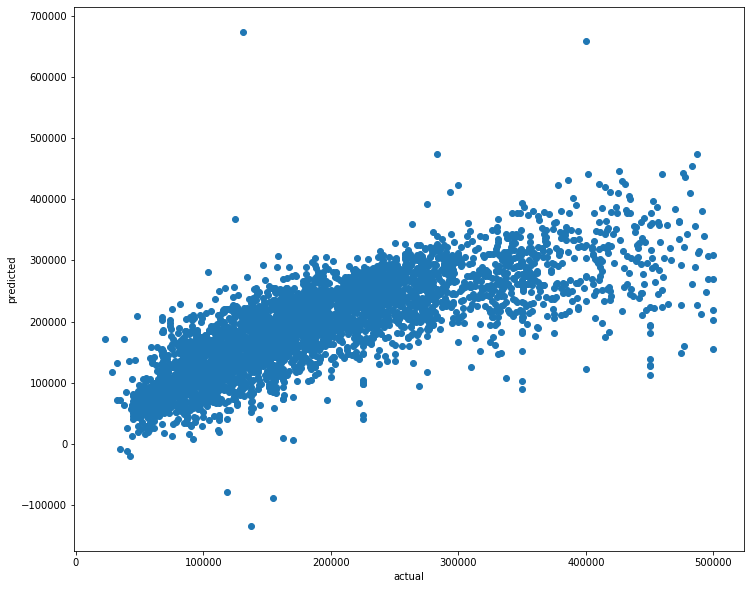

In [63]:
fig, ax = plt.subplots(figsize = (12,10))
plt.scatter(y_test, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

In [64]:
df_pred_actual_sample = df_pred_actual.sample(100).reset_index()


In [66]:
df_pred_actual_sample.shape

(100, 3)

In [68]:
df_pred_actual_sample.head(5)

,index,pred,actual
0,19931,185999.051704,113000.0
1,12737,212771.144013,175200.0
2,5514,187727.840035,276700.0
3,14120,155783.375674,93200.0
4,2456,86500.570758,110000.0


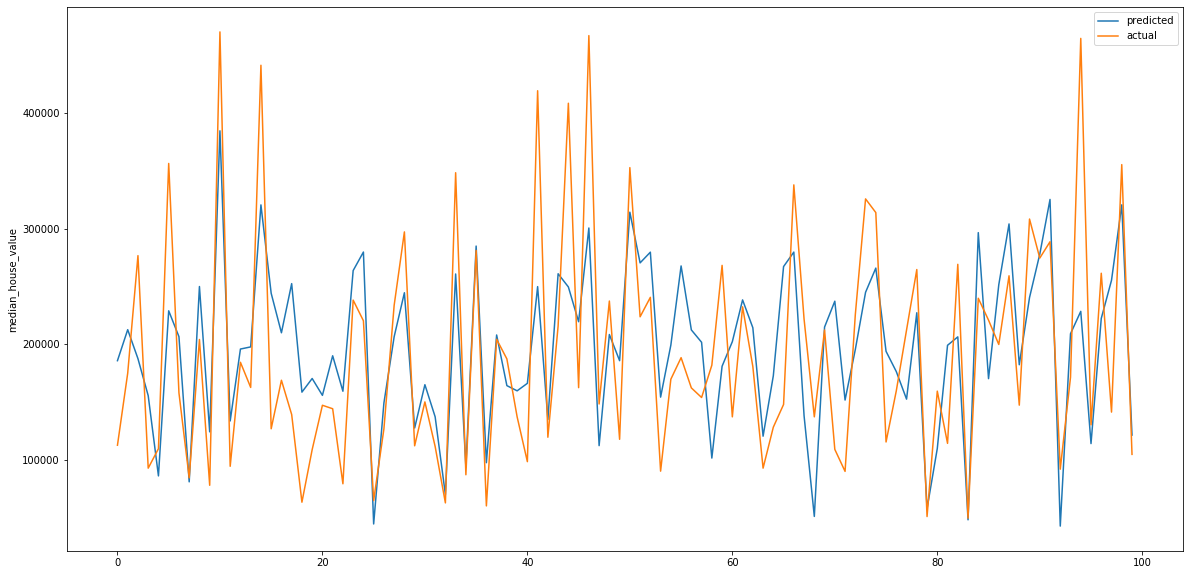

In [69]:
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(df_pred_actual_sample['pred'], label ='predicted')
plt.plot(df_pred_actual_sample['actual'], label ='actual')
plt.legend()
plt.ylabel("median_house_value")
plt.show()


## The End